 <p style = "font-size: 35px;font-weight: bold;text-align:center;color:#800000"> Yelp API Reviews : Exploratory Data Analysis </p>

<div>
    <img src = "http://upload.wikimedia.org/wikipedia/en/0/0c/Mu_Sigma_Logo.jpg" align="left" style="height:100px;margin-right:100px">
</div>
<div>
    <img src = "https://upload.wikimedia.org/wikipedia/commons/2/26/Ecolab.svg" align="right" style="height:40px;margin-left:100px; margin-top:25px">
</div>

<p style="font-size:100%;text-align:left;font-weight:bold"> Created by  : Mu Sigma team for Ecolab
<p style="font-size:100%;text-align:left;font-weight:bold;"> Last edited : 06/01/2021

 <p style = "font-size: 20px;font-weight: bold;text-align: left;color:#000000"> Description:   </p>
 
This notebook is used to perform exploratory data analysis for reviews from Yelp API.<br>

Data Used: <br>
* For <b>Sentiment Information</b>, across different brands, we have used different review sample pulled from <b>Yelp API</b> and run a sentiment analysis from a pre trained model using Flair package

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
import itertools
import datetime
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats.stats import pearsonr
from scipy import stats
import matplotlib
import seaborn as sns
import pytz
import pyodbc
utc=pytz.UTC
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:.4f}'.format

In [9]:
########################################################## Reviews Data #################################################################
#########################################################################################################################################

# Reading reviews data
df_panera  = pd.read_csv('/User/yelpapi/Sentiment/Panera.csv')
df_panera = df_panera.loc[:, ~df_panera.columns.str.contains('^Unnamed')]
df_panera['Brand'] = 'Panera'

df_ihop  = pd.read_csv('/User/yelpapi/Sentiment/Ihop.csv')
df_ihop = df_ihop.loc[:, ~df_ihop.columns.str.contains('^Unnamed')]
df_ihop['Brand'] = 'IHOP'

df_buffalow = pd.read_csv('/User/yelpapi/Sentiment/Buffalo_Wild_Wings.csv')
df_buffalow = df_buffalow.loc[:, ~df_buffalow.columns.str.contains('^Unnamed')]
df_buffalow['Brand'] = 'Buffalo Wild Wings'

df_noodles = pd.read_csv('/User/yelpapi/Sentiment/Noodles.csv')
df_noodles = df_noodles.loc[:, ~df_noodles.columns.str.contains('^Unnamed')]
df_noodles['Brand'] = 'Noodles & Co.'

df_benihana = pd.read_csv('/User/yelpapi/Sentiment/Benihana.csv')
df_benihana = df_benihana.loc[:, ~df_benihana.columns.str.contains('^Unnamed')]
df_benihana['Brand'] = 'Benihana National Corp'

df_ontheboard = pd.read_csv('/User/yelpapi/Sentiment/On_the_border.csv')
df_ontheboard = df_ontheboard.loc[:, ~df_ontheboard.columns.str.contains('^Unnamed')]
df_ontheboard['Brand'] = 'On the Border'

df_applebees = pd.read_csv('/User/yelpapi/Sentiment/Applebee.csv')
df_applebees = df_applebees.loc[:, ~df_applebees.columns.str.contains('^Unnamed')]
df_applebees['Brand'] = "Applebee's"

df_friendlys = pd.read_csv('/User/yelpapi/Sentiment/Friendlys.csv')
df_friendlys = df_friendlys.loc[:, ~df_friendlys.columns.str.contains('^Unnamed')]
df_friendlys['Brand'] = "Friendly's"

df_margaritaville = pd.read_csv('/User/yelpapi/Sentiment/Margaritaville.csv')
df_margaritaville = df_margaritaville.loc[:, ~df_margaritaville.columns.str.contains('^Unnamed')]
df_margaritaville['Brand'] = 'Margaritaville'

df_rubytuesday = pd.read_csv('/User/yelpapi/Sentiment/Ruby_Tuesday.csv')
df_rubytuesday = df_rubytuesday.loc[:, ~df_rubytuesday.columns.str.contains('^Unnamed')]
df_rubytuesday['Brand'] = 'Ruby Tuesday Inc.'

df_wingstop = pd.read_csv('/User/yelpapi/Sentiment/WingStop.csv')
df_wingstop = df_wingstop.loc[:, ~df_wingstop.columns.str.contains('^Unnamed')]
df_wingstop['Brand'] = 'WingStop'

df_modmarket = pd.read_csv('/User/yelpapi/Sentiment/Modern_Market.csv')
df_modmarket = df_modmarket.loc[:, ~df_modmarket.columns.str.contains('^Unnamed')]
df_modmarket['Brand'] = 'Modern Market'

df_truefood = pd.read_csv('/User/yelpapi/Sentiment/True_Food_Kitchen.csv')
df_truefood = df_truefood.loc[:, ~df_truefood.columns.str.contains('^Unnamed')]
df_truefood['Brand'] = 'True Food Kitchen'

df_txroadhouse = pd.read_csv('/User/yelpapi/Sentiment/Texas_Roadhouse.csv')
df_txroadhouse = df_txroadhouse.loc[:, ~df_txroadhouse.columns.str.contains('^Unnamed')]
df_txroadhouse['Brand'] = 'Texas Roadhouse'

df_famousdave = pd.read_csv('/User/yelpapi/Sentiment/Famous_Dave.csv')
df_famousdave = df_famousdave.loc[:, ~df_famousdave.columns.str.contains('^Unnamed')]
df_famousdave['Brand'] = "Famous Dave's of America,  Inc."

df_zupas = pd.read_csv('/User/yelpapi/Sentiment/Cafe_Zupas.csv')
df_zupas = df_zupas.loc[:, ~df_zupas.columns.str.contains('^Unnamed')]
df_zupas['Brand'] = 'Cafe Zupas'

# df_fourcorners = pd.read_csv('./csv/Four_Corners.csv')
# df_fourcorners = df_fourcorners.loc[:, ~df_fourcorners.columns.str.contains('^Unnamed')]
# df_fourcorners['Brand'] = 'Four Corners Tavern Group'

df_charleys = pd.read_csv('/User/yelpapi/Sentiment/O_Charleys.csv')
df_charleys = df_charleys.loc[:, ~df_charleys.columns.str.contains('^Unnamed')]
df_charleys['Brand'] = "O'Charley's, Inc."

df_twinpeaks = pd.read_csv('/User/yelpapi/Sentiment/Twin_Peaks.csv')
df_twinpeaks = df_twinpeaks.loc[:, ~df_twinpeaks.columns.str.contains('^Unnamed')]
df_twinpeaks['Brand'] = 'Twin Peaks'

df_woodranch = pd.read_csv('/User/yelpapi/Sentiment/Wood_Ranch.csv')
df_woodranch = df_woodranch.loc[:, ~df_woodranch.columns.str.contains('^Unnamed')]
df_woodranch['Brand'] = 'Wood Ranch'

df_review = df_panera.append([df_ihop, df_buffalow, df_noodles,
                              df_benihana, df_ontheboard, df_applebees, df_friendlys,
                              df_margaritaville, df_rubytuesday, df_wingstop, df_modmarket,
                              df_truefood, df_txroadhouse, df_famousdave, df_zupas, df_charleys,
                              df_twinpeaks, df_woodranch])

df_review = df_review[df_review['date'].notnull()]

# Getting Month-Year from date
df_review['Date'] = pd.to_datetime(df_review['date'], errors='coerce')
df_review['Date'] = df_review['Date'].dt.date
df_review['month_year'] = df_review['Date'].apply(lambda x: x.strftime('%B-%Y'))

# Flags to be used in aggregation
df_review['Negative_flag'] = np.where(df_review['Flair_Score'] < 0,1,0)
df_review['Positive_flag'] = np.where(df_review['Flair_Score'] > 0,1,0)

df_grouped_review = df_review.groupby(['month_year', 'Brand'], as_index=False).agg({'Flair_Score' : 'mean',
                                                                           'Positive_flag' : 'sum',
                                                                           'Negative_flag' : 'sum',
                                                                           'rating' : 'mean',
                                                                           'text' : 'count'})
df_grouped_review.rename({'text' : 'No_of_Reviews',
                          'rating' : 'Rating',
                          'Positive_flag': 'Positive_Reviews',
                          'Negative_flag': 'Negative_Reviews'}, axis=1, inplace=True)

# Calculating KPIs
df_grouped_review['Positive_Review_Percent'] = (df_grouped_review['Positive_Reviews']/df_grouped_review['No_of_Reviews'])*100
df_grouped_review['Negative_Review_Percent'] = (df_grouped_review['Negative_Reviews']/df_grouped_review['No_of_Reviews'])*100

In [10]:
print(df_grouped_review.Brand.nunique())
print(df_grouped_review.Brand.unique())

19
["O'Charley's, Inc." 'Panera' 'IHOP' 'Noodles & Co.' 'Texas Roadhouse'
 "Applebee's" 'Buffalo Wild Wings' 'On the Border' 'WingStop' "Friendly's"
 'Ruby Tuesday Inc.' 'Twin Peaks' 'Cafe Zupas'
 "Famous Dave's of America,  Inc." 'Margaritaville' 'Modern Market'
 'Wood Ranch' 'True Food Kitchen' 'Benihana National Corp']


## Timeline for each brand - a table with min date , max date and No of Reviews

In [41]:
table = df_review.groupby(['Brand'], as_index=False).agg({'Date' : ['min', 'max'], 'text' : 'count'})
table.columns = ['_'.join(col) for col in table.columns]
table.rename({'text_count' : 'No_of_Reviews'}, axis=1, inplace=True)
table

,Brand_,Date_min,Date_max,No_of_Reviews
0,Applebee's,2005-07-06,2021-05-26,93291
1,Benihana National Corp,2019-08-19,2021-05-20,200
2,Buffalo Wild Wings,2006-06-21,2021-05-24,33921
3,Cafe Zupas,2008-02-20,2021-05-20,6638
4,"Famous Dave's of America, Inc.",2008-02-20,2021-05-20,6638
5,Friendly's,2006-03-10,2021-05-21,5664
6,IHOP,2005-06-12,2021-05-25,111364
7,Margaritaville,2010-10-06,2021-05-20,3922
8,Modern Market,2013-07-29,2021-05-20,4331
9,Noodles & Co.,2005-05-19,2021-05-20,23293


## Sentiment vs No. of reviews - bar graphs 

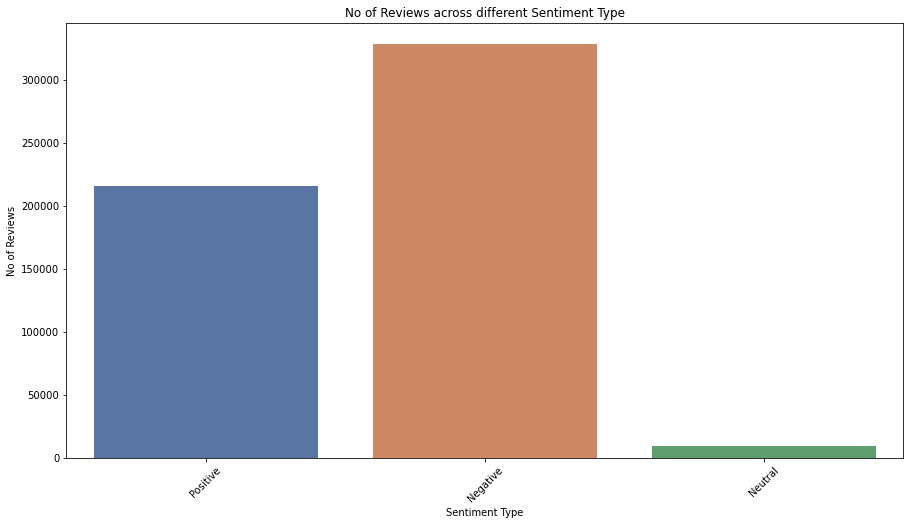

In [47]:
def req_intervals(x):
    if (x < -0.5) & (x > -1):
        return 'Score (-0.5 to -1)'
    elif (x < 0) & (x > -0.5):
        return 'Score (-0.5 to 0)'
    elif (x < 0.5) & (x > 0):
        return 'Score (0 to 0.5)'
    else:
        return 'Score (0.5 to 1)'


df_dist_senti['sentiment_bucket'] = df_dist_senti['Flair_Score'].apply(req_intervals)

new_order = ['Score (-0.5 to -1)', 'Score (-0.5 to 0)', 'Score (0 to 0.5)', 'Score (0.5 to 1)']

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Sentiment_Type', data=df_dist_senti, palette = 'deep')
ax.set(xlabel = 'Sentiment Type', ylabel = 'No of Reviews')
ax.set_title('No of Reviews across different Sentiment Type')
plt.xticks(rotation=45)
plt.show()

In [15]:
df_review.Sentiment_Type.value_counts()

Negative    328488
Positive    215579
Neutral       9479
Name: Sentiment_Type, dtype: int64

In [14]:
df_review["text_word_count"] = df_review["text"].apply(lambda text: len(text.split()))

In [16]:
df_review[df_review.Sentiment_Type=='Negative'].text_word_count.median()

82.0

In [17]:
df_review[df_review.Sentiment_Type=='Positive'].text_word_count.median()

55.0

In [18]:
df_review[df_review.Sentiment_Type=='Neutral'].text_word_count.median()

67.0

In [26]:
df = pd.DataFrame({'Word_Count' : [82, 55, 67], 'Sentiment' : ['Negative', 'Positive', 'Neutral']})
df

,Word_Count,Sentiment
0,82,Negative
1,55,Positive
2,67,Neutral


## Avg No. of words per review - across Sentiment Type

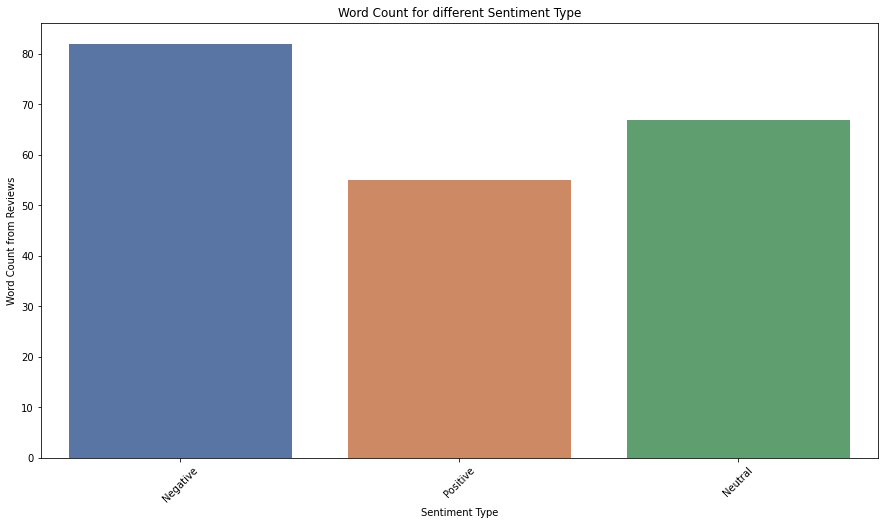

In [29]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Sentiment', y='Word_Count', data=df, palette = 'deep')
ax.set(xlabel = 'Sentiment Type', ylabel = 'Word Count from Reviews')
ax.set_title('Word Count for different Sentiment Type')
plt.xticks(rotation=45)
plt.show()